### Simulación del Examen (Core)

Contexto:

La tarea es limpiar y explorar los datos para una compañía de tecnología emergente que desarrolla aplicaciones móviles. La empresa quiere mejorar la experiencia del usuario y aumentar la retención de usuarios en sus aplicaciones. Han recolectado datos sobre el uso de sus aplicaciones y quieren entender mejor cómo los usuarios interactúan con sus productos.

In [1]:
import pandas as pd
import numpy as np
import random

# Configuramos la semilla para reproducibilidad
np.random.seed(42)

# Generamos los datos sintéticos
user_id = range(1, 301)
app_version = np.random.choice(['1.0', '1.1', '1.2', '1.3'], 300)
platform = np.random.choice(['Android', 'iOS'], 300)
session_duration = np.random.randint(1, 180, 300)
number_of_sessions = np.random.randint(1, 20, 300)
country = np.random.choice(['USA', 'Canada', 'Mexico', 'UK', 'Germany', 'France', 'Spain', 'Italy'], 300)
user_feedback = np.random.randint(1, 6, 300)

# Creamos el DataFrame
data = pd.DataFrame({
    'user_id': user_id,
    'app_version': app_version,
    'platform': platform,
    'session_duration': session_duration,
    'number_of_sessions': number_of_sessions,
    'country': country,
    'user_feedback': user_feedback
})

# Guardamos los datos en un archivo CSV
data.to_csv('user_app_data.csv', index=False)
print("Datos generados y guardados en 'user_app_data.csv'")

Datos generados y guardados en 'user_app_data.csv'


1) Limpieza de Datos:

El primer paso en este proceso es usar Python para limpiar los datos y dejarlos listos para el análisis. Deben:

Identificar y abordar cualquier valor duplicado.

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             300 non-null    int64 
 1   app_version         300 non-null    object
 2   platform            300 non-null    object
 3   session_duration    300 non-null    int32 
 4   number_of_sessions  300 non-null    int32 
 5   country             300 non-null    object
 6   user_feedback       300 non-null    int32 
dtypes: int32(3), int64(1), object(3)
memory usage: 13.0+ KB


In [3]:
data.duplicated().sum()

0

No existen valores duplicados


Identificar y abordar cualquier dato que falte en este conjunto de datos. Trátenlos de forma adecuada. Incluyan una breve descripción en el método que usan para tratar con los valores que faltan junto con una justificación para el uso de ese método.

In [4]:
qsna=data.shape[0]-data.isnull().sum(axis=0)
qna=data.isnull().sum(axis=0)
ppna=round(100*(data.isnull().sum(axis=0)/data.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
user_id,300,0,0.0
app_version,300,0,0.0
platform,300,0,0.0
session_duration,300,0,0.0
number_of_sessions,300,0,0.0
country,300,0,0.0
user_feedback,300,0,0.0


No hay valores nulos.


Asegurarse de que todas las columnas coincidan con los tipos de datos enumerados en el diccionario de datos.

In [5]:
data.dtypes

user_id                int64
app_version           object
platform              object
session_duration       int32
number_of_sessions     int32
country               object
user_feedback          int32
dtype: object

In [6]:
data['app_version'] = data.app_version.astype('category')
data['platform'] = data.platform.astype('category')
data['country'] = data.country.astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   user_id             300 non-null    int64   
 1   app_version         300 non-null    category
 2   platform            300 non-null    category
 3   session_duration    300 non-null    int32   
 4   number_of_sessions  300 non-null    int32   
 5   country             300 non-null    category
 6   user_feedback       300 non-null    int32   
dtypes: category(3), int32(3), int64(1)
memory usage: 7.5 KB


Identificar y abordar cualquier inconsistencia en los valores categóricos (ejemplo: android, Android, ANDROID).

In [7]:
data.app_version.unique()

['1.2', '1.3', '1.0', '1.1']
Categories (4, object): ['1.0', '1.1', '1.2', '1.3']

In [8]:
data.platform.unique()

['Android', 'iOS']
Categories (2, object): ['Android', 'iOS']

In [9]:
data.country.unique()

['France', 'UK', 'Canada', 'Germany', 'Mexico', 'USA', 'Spain', 'Italy']
Categories (8, object): ['Canada', 'France', 'Germany', 'Italy', 'Mexico', 'Spain', 'UK', 'USA']

Identificar y abordar cualquier punto de datos inapropiados o inusuales (ejemplo: tiempo de uso de 10000 horas en una semana).

In [10]:
data.session_duration.describe()

count    300.000000
mean      95.840000
std       51.922773
min        1.000000
25%       51.250000
50%      100.500000
75%      141.250000
max      179.000000
Name: session_duration, dtype: float64

In [13]:
data.user_feedback.describe()

count    300.000000
mean       2.926667
std        1.449699
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: user_feedback, dtype: float64

No hay datos anomalos

###  Exploración de Datos:

Dos tipos diferentes de visualizaciones exploratorias univariantes. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

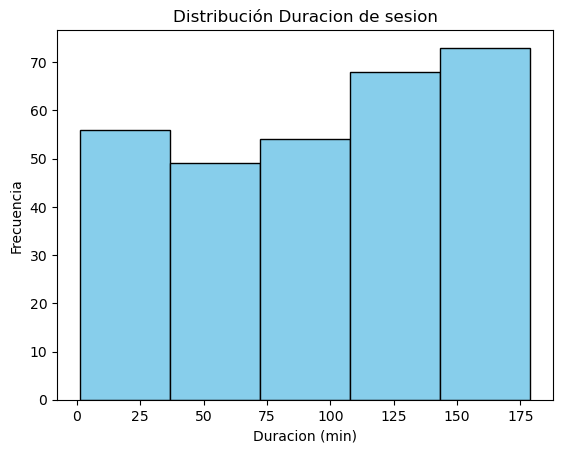

In [18]:
import matplotlib.pyplot as plt
plt.hist(data['session_duration'], bins=5, color='skyblue', edgecolor='black')
plt.title("Distribución Duracion de sesion")
plt.xlabel("Duracion (min)")
plt.ylabel("Frecuencia")
plt.show()


La mayoria de los datos se concentran hacia una duracuib entre 150 y 175 min. Los usuarios tienden a tener sesiones mas largas que cortas.


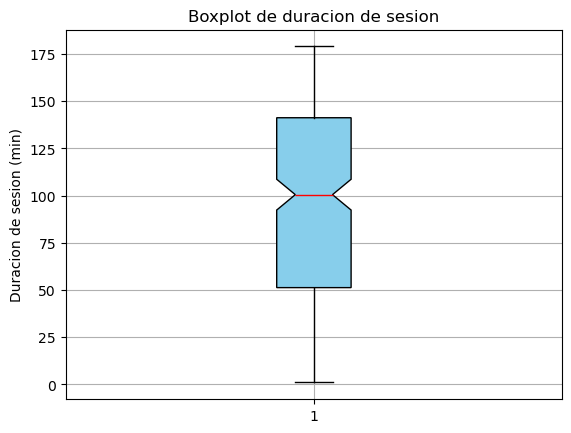

In [12]:
plt.boxplot(data['session_duration'], notch=True, patch_artist=True, boxprops=dict(facecolor='skyblue', color='black'), medianprops=dict(color='red'), whiskerprops=dict(color='black'), capprops=dict(color='black'))
plt.title("Boxplot de duracion de sesion")
plt.ylabel("Duracion de sesion (min)")
plt.grid(True)
plt.show()

Este gráfico proporciona una visión clara de la dispersión y la mediana de las duraciones de sesión. La mayoría de las sesiones tienen una duración entre 75 y 125 minutos, con una pequeña cantidad de sesiones más cortas o más largas que se extienden hasta casi 0 minutos y 175 minutos, respectivamente. Esto refuerza la idea de que las sesiones más largas son relativamente comunes.

Dos tipos diferentes de visualizaciones exploratorias multivariantes. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

C:\Users\Gonzalo\AppData\Local\Temp\ipykernel_13212\4053681845.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='platform', y='session_duration', data=data, palette='Set2')


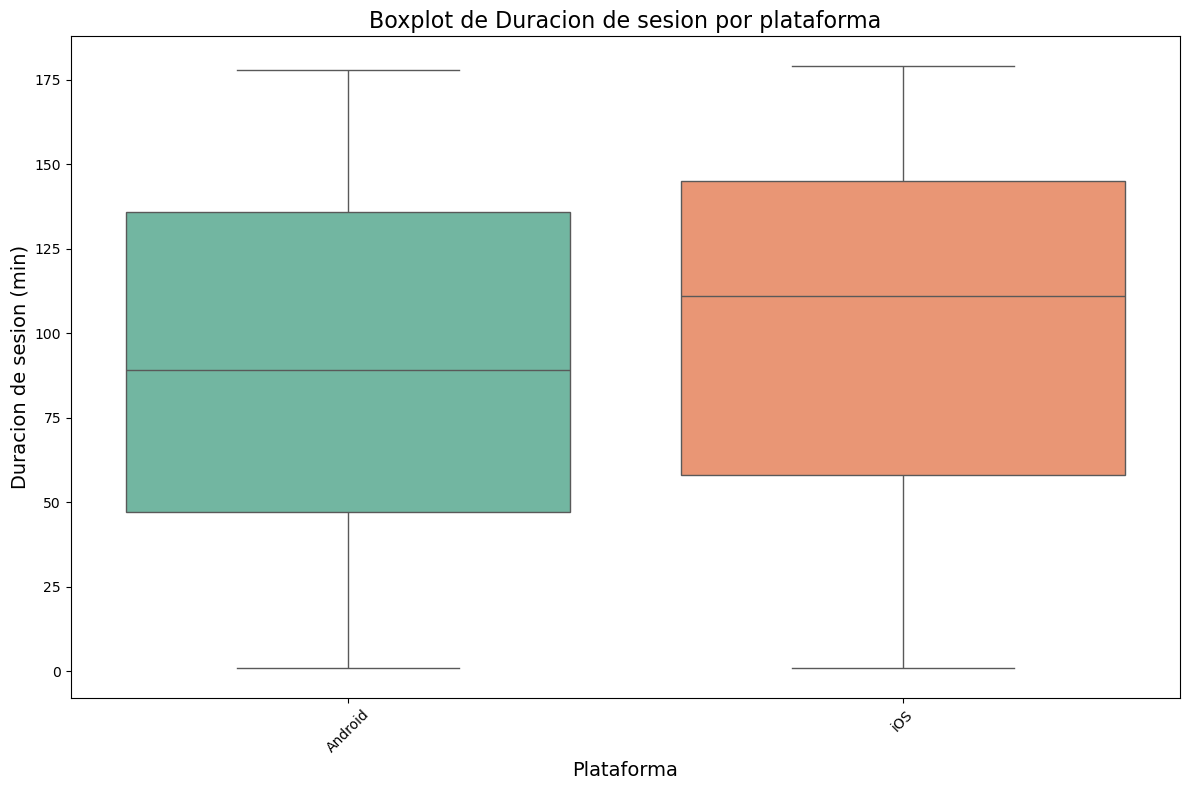

In [15]:
import seaborn as sns
# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))
# Crear el boxplot usando seaborn
sns.boxplot(x='platform', y='session_duration', data=data, palette='Set2')
# Añadir títulos y etiquetas
plt.title('Boxplot de Duracion de sesion por plataforma', fontsize=16)
plt.xlabel('Plataforma', fontsize=14)
plt.ylabel('Duracion de sesion (min)', fontsize=14)
# Rotar etiquetas del eje x si es necesario
plt.xticks(rotation=45)
# Mostrar el gráfico
plt.tight_layout()
plt.show()

La diferencia entre Android e iOS en cuanto a la duración de las sesiones no parece ser muy grande. Sin embargo, los usuarios de iOS muestran una mayor dispersión de las sesiones, lo que podría interpretarse como una mayor variabilidad en sus hábitos de uso.

C:\Users\Gonzalo\AppData\Local\Temp\ipykernel_13212\2868045931.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= country, y= session_duration,  data=data, palette='Set2')


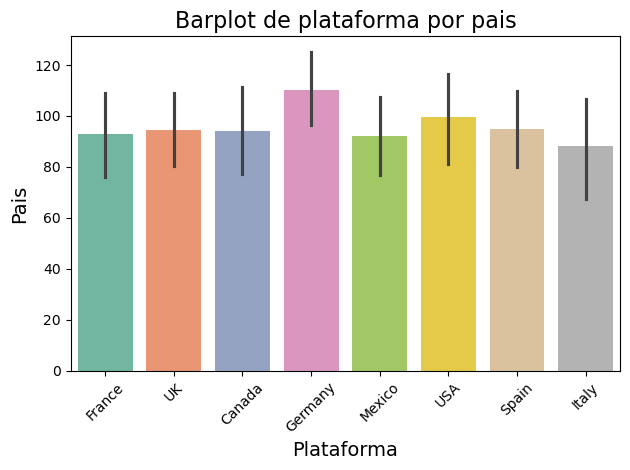

In [19]:
sns.barplot(x= country, y= session_duration,  data=data, palette='Set2')
# Añadir títulos y etiquetas
plt.title('Barplot de plataforma por pais', fontsize=16)
plt.xlabel('Plataforma', fontsize=14)
plt.ylabel('Pais', fontsize=14)
# Rotar etiquetas del eje x si es necesario
plt.xticks(rotation=45)
# Mostrar el gráfico
plt.tight_layout()
plt.show()

Este gráfico sugiere que hay cierta variabilidad en los datos entre países, especialmente en Germany que presenta un valor alto con mayor dispersión. Sin embargo, en general, las diferencias no parecen ser extremas, ya que muchos países están en valores similares.